In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset Exploration

In this notebook, we explore the saved dataset that is used for all the different experiments.

For each run, we will no longer read all images and look at the skin ratio. 

## 1.1 Visualize csv file

In [66]:
df = pd.read_csv('gs://oro-ds-test-bucket/sdd_acne_files/dataset/dataset_0.2.csv')
df.head(5)

,Unnamed: 0,pathBucketImage,labelledby,reviewedby,acne_comedos,acne_cystic,acne_mixed,acne_scars,acne_excoriated,rosacea_erythemato_telangiectasique,...,molluscum,folliculitis,melanonychia,nevus,lichen_planus,chelitis_actinic,cheilitis_eczematous,urticaria,unspecified,ratios
0,0,resized/936/E617F7DF5F/ailment_photos/AP-cc6f0...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.485989
1,2,resized/27727/4E12DB8B1F/ailment_photos/AP-f8e...,Guillemette Salomon,NaN,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0.514150
2,3,resized/10000/1C02D39543/ailment_photos/AP-6a2...,Marc-Andre Dore,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.295201
3,4,resized/9371/AA7EC2BACF/ailment_photos/AP-d914...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0.400610
4,9,resized/27727/4E12DB8B1F/ailment_photos/AP-e51...,Guillemette Salomon,NaN,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0.629365


In [67]:
print(f'There are {df.shape[0]} images in the dataset')

There are 21535 images in the dataset


In [68]:
print(f"These are the labelers: {df['labelledby'].unique()}")

These are the labelers: ['Guillemette Salomon' 'Marc-Andre Dore']


In [69]:
print(f"These are the reviewers: {df['labelledby'].unique()}")

These are the reviewers: ['Guillemette Salomon' 'Marc-Andre Dore']


In [70]:
# See time intervall between images
df['dateInserted'] =pd.to_datetime(df['dateInserted'])
print(df['dateInserted'].min())
print(df['dateInserted'].max())

2020-12-23 00:00:00
2021-03-08 00:00:00


## 1.2 Drop columns that are not relevant to our analysis

In this section, we remove the columns that are not relevant to our analysis

In [71]:
# drop all columsn except labels
df = df.drop(columns=['Unnamed: 0', 'pathBucketImage', 'labelledby', 'reviewedby',
                     'dateInserted'])

In [72]:
all_columns = ['rosacea_inflammatory','rosacea_erythemato_telangiectasique','peri_oral_dermatitis',
                'seborrheic_keratosis','psoriasis_vulgar','seborrheic_dermatitis','nummular_eczema',
                'tinea_versicolor','chronic_hand_eczema','vulgar_warts','folliculitis','alopecia_androgenic',
                'dyshidrosis','nevus','melasma','alopecia_areata','intertrigo','urticaria','vitiligo','keratosis_pilaris',
                'molluscum','cheilitis_eczematous','tinea_corporis','prurigo_nodularis','actinic_keratosis',
                'genital_warts','plane_warts','pityriasis_rosae','melanonychia','psoriasis_pustular_palmoplantar',
                'granuloma_annulare','psoriasis_guttate','lichen_simplex_chronicus','shingles','herpes_simplex', 'acne_cystic', 'acne_scars', 'acne_mixed', 'acne_excoriated', 'acne_comedos']

In [73]:
print(f' In the current pipeline, there are {df.shape[0]} labeled  images.')
print(f' In the current pipeline, there are {df.loc[(df[all_columns].sum(axis=1) == 1),:].shape[0]} images with only one labeled.')

 In the current pipeline, there are 21535 labeled  images.
 In the current pipeline, there are 18797 images with only one labeled.


## 1.3 Skin Ratio Analysis

In [74]:
np.arange(0, 1+0.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

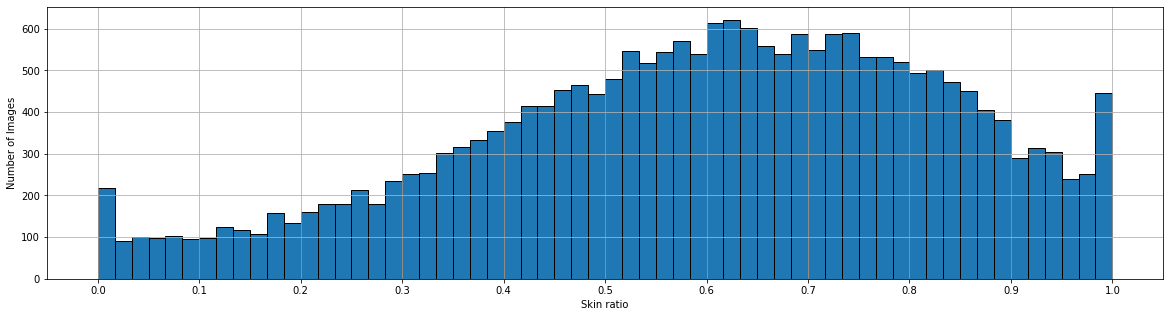

In [75]:
plt.figure(figsize=(20,5))
plt.ylabel('Number of Images')
plt.xticks(np.arange(0, 1+0.1, 0.1))
plt.xlabel('Skin ratio')
df['ratios'].hist(bins=60, ec="k")
plt.show()

## 1.4 Labels Visualization

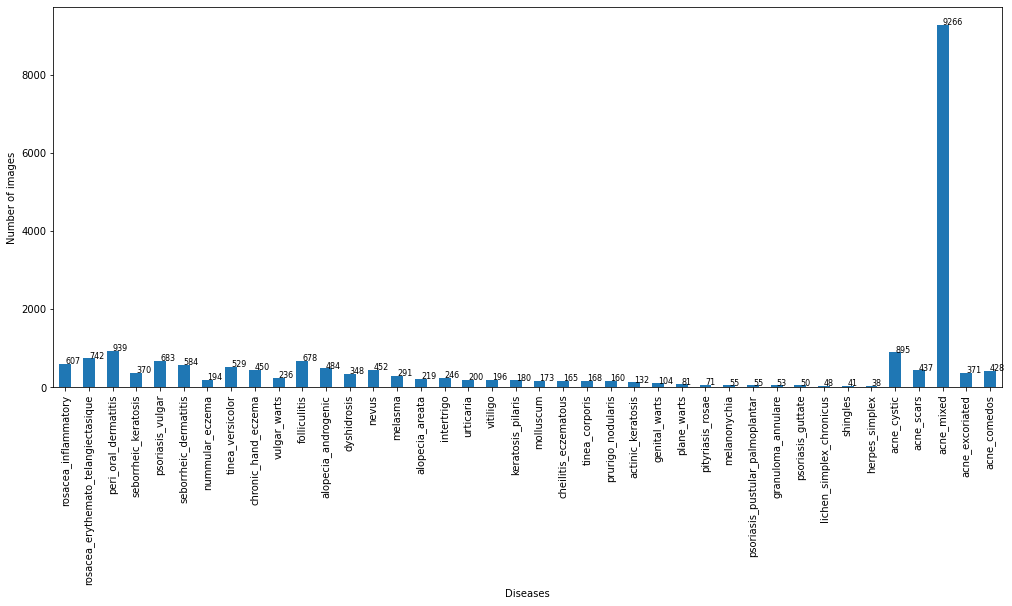

In [76]:
plt.figure(figsize=(17,7))
df[all_columns].sum().plot(kind='bar')
plt.ylabel('Number of images')
plt.xlabel('Diseases')
for index, data in enumerate(df[all_columns].sum()):
  plt.text(x=index, y=data+0.5, s=f'{data}', fontdict=dict(fontsize=8))
plt.show()

# 1.4 Diseases Percentage

In [77]:
df = pd.read_csv('gs://oro-ds-test-bucket/shanel_test/raw_image_paths_from_db.csv')

In [78]:
(df[all_columns].sum() / (df[all_columns].sum().sum()) *100)

rosacea_inflammatory                    4.319692
rosacea_erythemato_telangiectasique     4.796257
peri_oral_dermatitis                    4.153550
seborrheic_keratosis                    1.731375
psoriasis_vulgar                        3.187303
seborrheic_dermatitis                   2.653900
nummular_eczema                         0.870059
tinea_versicolor                        2.317244
chronic_hand_eczema                     2.186079
vulgar_warts                            1.084295
folliculitis                            2.994928
alopecia_androgenic                     2.116125
dyshidrosis                             1.534627
nevus                                   2.002448
melasma                                 1.289787
alopecia_areata                         0.957503
intertrigo                              1.114900
urticaria                               0.874432
vitiligo                                0.861315
keratosis_pilaris                       0.786988
molluscum           